##### Library

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

##### Function

In [2]:
def read_json(path):
    return pd.read_json(path, orient="records", compression="gzip")

##### Configuration

In [3]:
path_data_final = '../../data/interim/final'

##### Load Data

In [4]:
df_products = read_json(f'{path_data_final}/products.json.gz')
df_reviews = read_json(f'{path_data_final}/reviews.json.gz')
df_users = read_json(f'{path_data_final}/users.json.gz')
df_categories = read_json(f'{path_data_final}/categories.json.gz')
df_products_categories = read_json(f'{path_data_final}/products_categories.json.gz')

##### Overview

In [5]:
print("Number of products:", len(df_products))
print("Number of reviews:", len(df_reviews))
print("Number of users:", len(df_users))
print("Number of categories:", len(df_categories))
print("Reviews per user:", len(df_reviews) / len(df_users))
print("Reviews per product:", len(df_reviews) / len(df_products))

Number of products: 1798
Number of reviews: 59561
Number of users: 55019
Number of categories: 8
Reviews per user: 1.0825532997691707
Reviews per product: 33.126251390433815


##### Number of Reviews per Rating (1 to 5)

Text(0, 0.5, 'Number of Reviews')

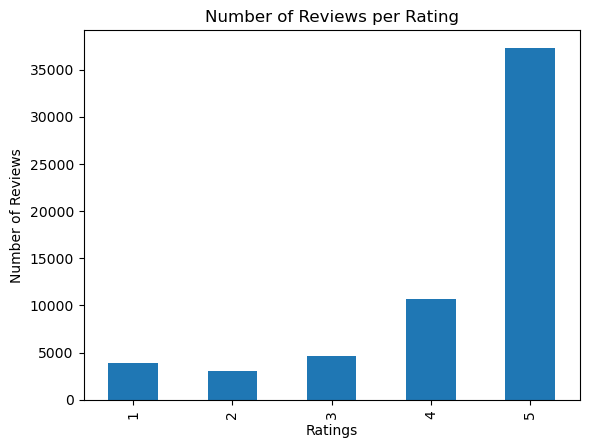

In [6]:
df_reviews['ratings'].value_counts().sort_index().plot(kind='bar')

plt.title('Number of Reviews per Rating')
plt.xlabel('Ratings')
plt.ylabel('Number of Reviews')

In [7]:
df_reviews.groupby('ratings').size().head(5)

ratings
1     3875
2     3019
3     4671
4    10697
5    37299
dtype: int64

In [8]:
df_reviews['ratings'].describe()

count    59561.000000
mean         4.251255
std          1.195757
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: ratings, dtype: float64

##### Number of Products per Category

Text(0, 0.5, 'Number of Products')

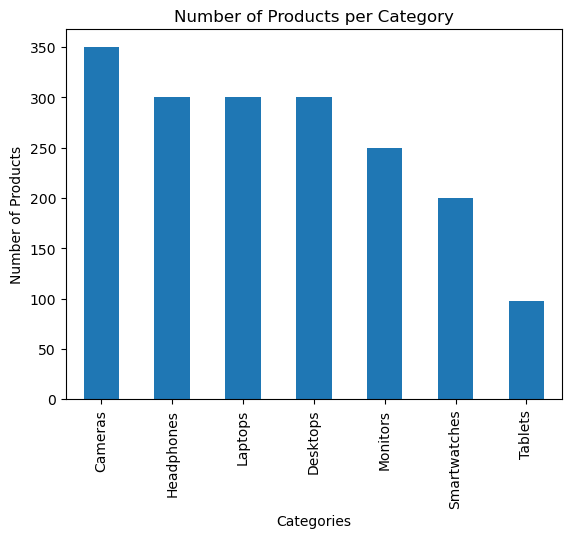

In [9]:
df_merged_products_categories = pd.merge(df_categories, df_products_categories, how="inner", on="category_id", validate="one_to_many").sort_values(by=["category_id"])

df_merged_products_categories['name'].value_counts().plot(kind='bar')
plt.title('Number of Products per Category')
plt.xlabel('Categories')
plt.ylabel('Number of Products')

In [10]:
df_merged_products_categories.groupby('name').size().head(10)

name
Cameras         350
Desktops        300
Headphones      300
Laptops         300
Monitors        250
Smartwatches    200
Tablets          98
dtype: int64